#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


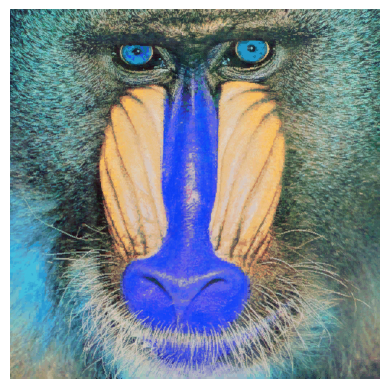

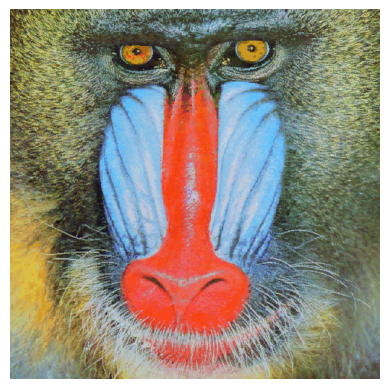

In [5]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

Convierte a grises para procesamiento posterior

(512, 512)


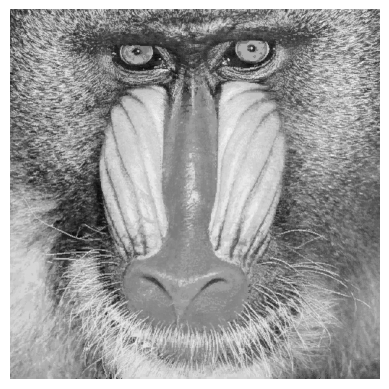

In [6]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)

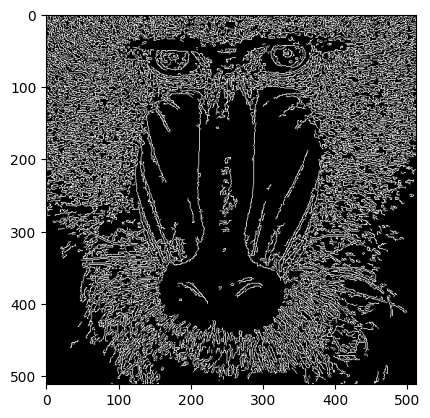

In [7]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Contar el número de píxeles no nulos por columna y visualizar

(0.0, 512.0)

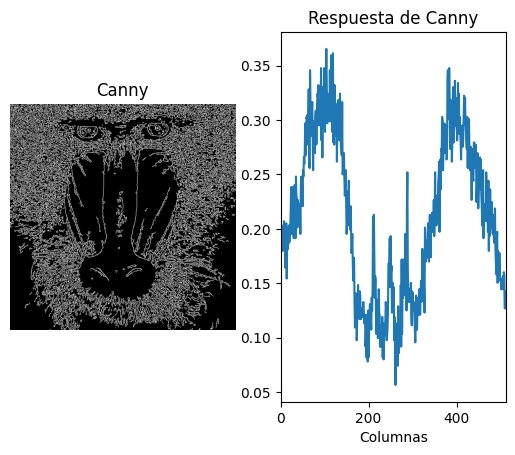

In [8]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

(0.0, 512.0)

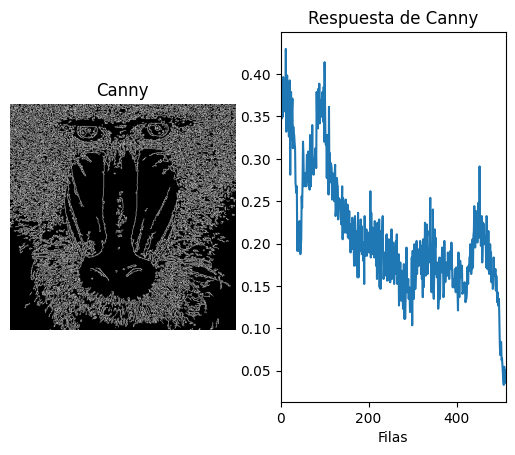

In [9]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1].

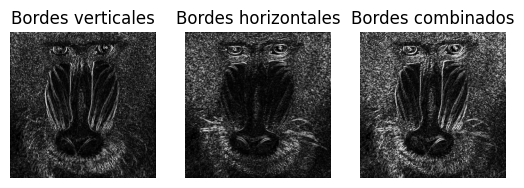

In [11]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')

#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

Visualizar la imagen resultado de Sobel directamenet como escala de grises produce un resultado diferente. Ha sido necesario convertir a datos de tipo byte. Un par de alternativas para dicha acción.

In [14]:
# Mostrar el tipo de dato de los valores en la imagen soble, además de valores máximo y mínimo
print(f"Tipo de datos, valor mínimo y máximo en sobel: {sobel.dtype}, {np.min(sobel)}, {np.max(sobel)}")

# Conversión a byte con openCV
sobel8_v1 = cv2.convertScaleAbs(sobel)
# Mostrar el tipo de dato de los valores en la imagen soble, además de valores máximo y mínimo
print(f"Tipo de datos, valor mínimo y máximo en sobel8_v1: {sobel8_v1.dtype}, {np.min(sobel8_v1)}, {np.max(sobel8_v1)}")

# Conversión a byte con numpy
sobel8_v2 = np.uint8(sobel)
# Mostrar el tipo de dato de los valores en la imagen soble, además de valores máximo y mínimo
print(f"Tipo de datos, valor mínimo y máximo en sobel8_v2: {sobel8_v2.dtype}, {np.min(sobel8_v2)}, {np.max(sobel8_v2)}")


Tipo de datos, valor mínimo y máximo en sobel: float64, -594.0, 570.0
Tipo de datos, valor mínimo y máximo en sobel8_v1: uint8, 0, 255
Tipo de datos, valor mínimo y máximo en sobel8_v2: uint8, 0, 254


TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

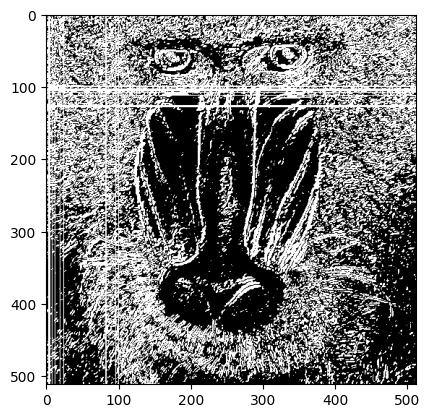

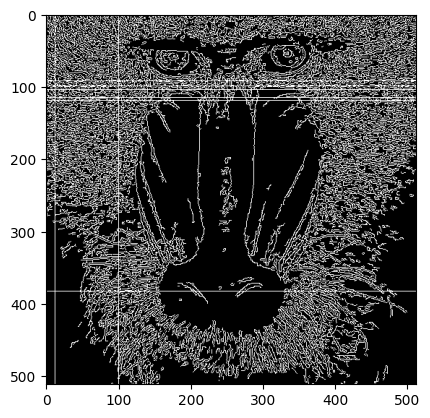

In [16]:
#Cálculo de las Derivadas de Sobel en los Ejes X e Y
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

sobel8_v2 = np.uint8(sobel)
#Define valor umbral
valorUmbral = 50 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido(sabel y canny)
res, imagenUmbralizada = cv2.threshold(sobel8_v1, valorUmbral, 255, cv2.THRESH_BINARY)
res, imagenUmbralizada2 = cv2.threshold(canny, valorUmbral, 255, cv2.THRESH_BINARY)



#Conteo de Píxeles Blancos por Filas y Columnas
#El resultado son matrices (row_counts, col_counts, etc.) que contienen la suma de los valores de píxeles (0 o 255) en cada fila o columna.
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

row_counts2 = cv2.reduce(imagenUmbralizada2, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts2 = cv2.reduce(imagenUmbralizada2, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna y se obtienen las filas y columnas que se encuentren por encima del 0.95*máximo
row = row_counts / 255
rows_up=np.where(row>=0.95*max(row))[0]
col = col_counts[0] / 255
cols_up=np.where(col>=0.95*max(col))[0]
row2 = row_counts2 / 255
rows_up2=np.where(row2>=0.95*max(row2))[0]
col2 = col_counts2[0] / 255
cols_up2=np.where(col2>=0.95*max(col2))[0]

#Dibuja líneas en la imagen binarizada imagenUmbralizada a lo largo de las filas (rows_up) y las columnas (cols_up) identificadas.
for r in rows_up:
    cv2.line(imagenUmbralizada, (r, 0), (r, 600), (255, 255, 255), 1)
for c in cols_up:
    cv2.line(imagenUmbralizada, (0, c), (600, c), (255, 255, 255), 1)
for r in rows_up2:
    cv2.line(imagenUmbralizada2, (r, 0), (r, 600), (255, 255, 255), 1)
for c in cols_up2:
    cv2.line(imagenUmbralizada2, (0, c), (600, c), (255, 255, 255), 1)


#Visualización de Resultados
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()
plt.imshow(imagenUmbralizada2, cmap='gray')
plt.show()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [17]:
import cv2
import numpy as np

# Función para mostrar la imagen con la transformación seleccionada
def mostrar_imagen(frame, modo):
    if modo == 'grises':
        return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    elif modo == 'bordes':
        return cv2.Canny(frame, 100, 200)
    elif modo == 'blur':
        return cv2.GaussianBlur(frame, (15, 15), 0)
    elif modo == 'sobel':
        # Aplicamos el filtro Sobel en direcciones X e Y
        sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en X
        sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en Y
        # Convertimos los gradientes a un formato visible (escala de grises y uint8)
        sobelx = cv2.convertScaleAbs(sobelx)
        sobely = cv2.convertScaleAbs(sobely)
        # Combinamos ambos gradientes
        sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
        return sobel_combined
    else:
        return frame

# Captura de video de la webcam
cap = cv2.VideoCapture(0)

# Modo inicial: mostrar la imagen original
modo = 'original'

while True:
    # Captura frame a frame
    ret, frame = cap.read()

    if not ret:
        break

    # Aplicar la transformación
    imagen_transformada = mostrar_imagen(frame, modo)

    # Mostrar el resultado en una ventana
    cv2.imshow('Demostrador OpenCV', imagen_transformada)

    # Esperar por la entrada del usuario para cambiar el modo
    key = cv2.waitKey(1) & 0xFF
    if key == ord('o'):
        modo = 'original'
    elif key == ord('g'):
        modo = 'grises'
    elif key == ord('c'):
        modo = 'bordes'
    elif key == ord('b'):
        modo = 'blur'
    elif key == ord('s'):
        modo = 'sobel'
    elif key == 27:  # Presiona ESC para salir
        break

# Liberar la cámara y cerrar ventanas
cap.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [18]:
import cv2
import numpy as np

# Cargar el modelo preentrenado de detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Iniciar la cámara
cap = cv2.VideoCapture(0)

while True:
    # Leer cada cuadro de la cámara
    ret, frame = cap.read()
    
    # Convertir a escala de grises para mejorar la detección
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detectar las caras
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Para cada cara detectada, aplicar el filtro Sobel
    for (x, y, w, h) in faces:
        # Extraer la región de la cara
        face_region = gray[y:y+h, x:x+w]
        
        # Aplicar filtro Sobel para detectar bordes
        sobelx = cv2.Sobel(face_region, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(face_region, cv2.CV_64F, 0, 1, ksize=5)
        sobel = cv2.sqrt(cv2.add(cv2.pow(sobelx, 2), cv2.pow(sobely, 2)))

        # Normalizar y convertir a un formato adecuado para mostrar
        sobel = cv2.convertScaleAbs(sobel)
        
        # Reemplazar la región de la cara original con la versión filtrada por Sobel
        frame[y:y+h, x:x+w] = cv2.cvtColor(sobel, cv2.COLOR_GRAY2BGR)
    
    # Mostrar el resultado
    cv2.imshow('Face Detection with Sobel Filter', frame)

    # Salir del bucle si se presiona 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
cv2.destroyAllWindows()
